## Investigating Californian Housing Prices with Regression Models 

In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Fetch the California housing dataset
data = fetch_california_housing(as_frame=True)

# Convert to a pandas DataFrame
housing_data = data.frame

# Display the first few rows
print(housing_data.head())

# Save locally if needed
housing_data.to_csv("housing_data.csv", index=False)

# Basic info about the dataset
print(housing_data.info())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population

In [4]:
print("-- INFO--")
print(housing_data.info())

print("-- DESCRIBE--")
print(housing_data.describe())

housing_data

-- INFO--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
-- DESCRIBE--
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.8461

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## 1.2 Visulizing Price Using Maps 

In [5]:
import folium
from folium.plugins import HeatMap

# Create a base map centered on California
california_map = folium.Map(location=[housing_data["Latitude"].mean(), housing_data["Longitude"].mean()], 
                            zoom_start=6)

# Add a heat map layer for MedHouseVal
heat_data = [
    [row['Latitude'], row['Longitude'], row['MedHouseVal']] 
    for _, row in housing_data.iterrows()
]

HeatMap(heat_data, radius=10).add_to(california_map)

# Save and display the map
california_map.save("california_housing_map.html")
california_map

### Correlation HeatMap
Looks like the Median Income is largely corrolated with the price of the house. This makes sense as people with higher income also tends to afford the most expensive houses.

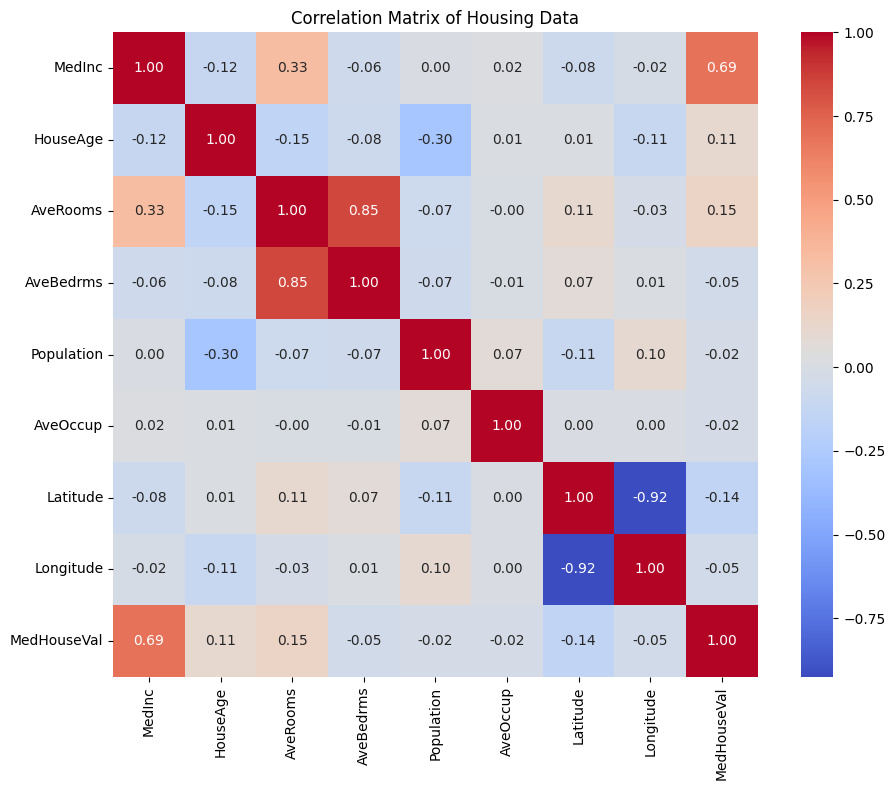

In [8]:
# Calculate the correlation matrix
import matplotlib.pyplot as plt 
import seaborn as sns

# Correlation Variables. 
correlation_matrix = housing_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Correlation Matrix of Housing Data")
plt.tight_layout()
plt.show()



In [26]:
from sklearn.linear_model import LinearRegression, GammaRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = housing_data[['MedInc',"AveRooms", "Population"]]
y = housing_data['MedHouseVal']

model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

print("R² Score:", r2_score(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

Coefficient: 0.4348247975266305
Intercept: 0.6492538144167537
R² Score: 0.5757877060324512
Mean Squared Error: 0.5558915986952437


In [29]:
X = housing_data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = housing_data['MedHouseVal']

model =  LinearRegression()
model.fit(X, y)

# Model summary
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("R² Score:", r2_score(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

Coefficients: [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
Intercept: -36.941920207184474
R² Score: 0.5757877060324512
Mean Squared Error: 0.5558915986952437


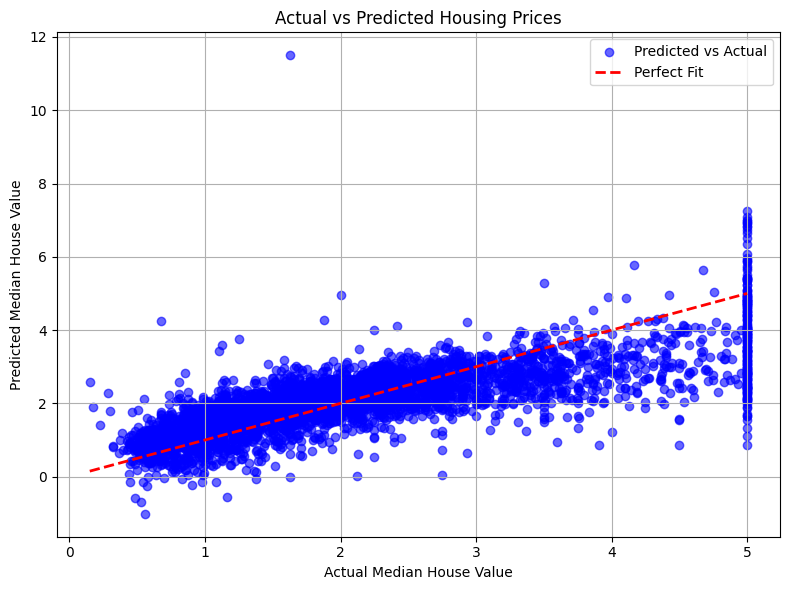

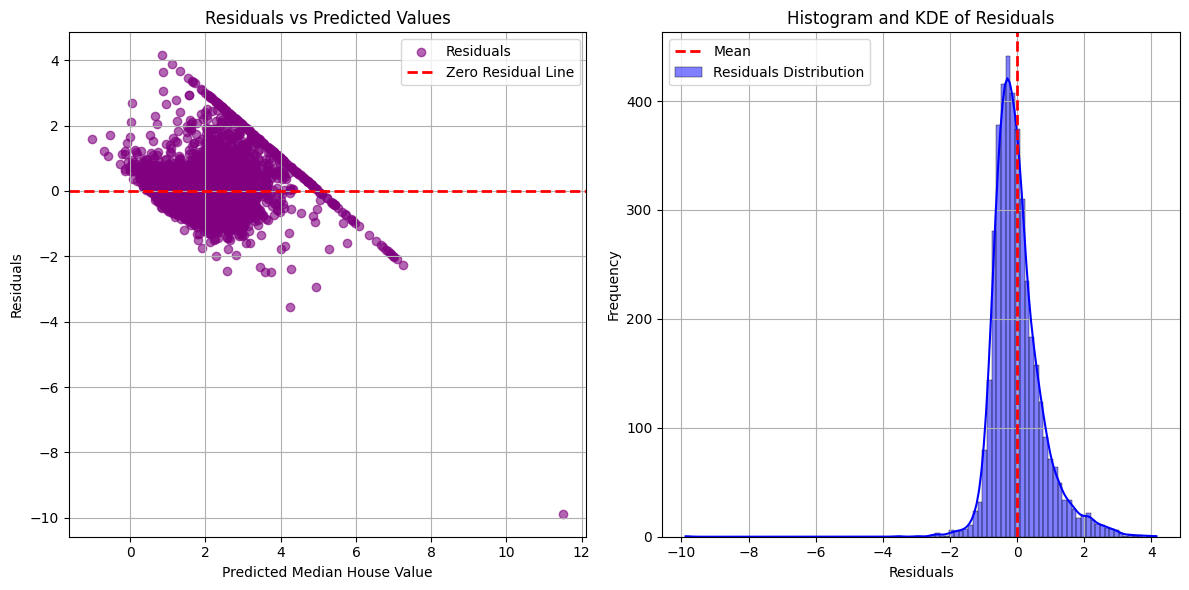

Shapiro-Wilk Test: p-value = 0.0000000000 (Residuals are not normally distributed)


In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Fit')
plt.title("Actual vs Predicted Housing Prices")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

from scipy.stats import shapiro

# Residuals calculation
residuals = y_test - predictions

# Residuals scatter plot
plt.figure(figsize=(12, 6))

# Subplot 1: Residuals vs Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(predictions, residuals, alpha=0.6, color='purple', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Residual Line')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Median House Value")
plt.ylabel("Residuals")
plt.legend()
plt.grid(True)

# Subplot 2: Histogram and KDE of Residuals
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, bins=100, color='blue', label='Residuals Distribution')
plt.axvline(residuals.mean(), color='red', linestyle='--', linewidth=2, label='Mean')
plt.title("Histogram and KDE of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality
stat, p = shapiro(residuals)
if p > 0.05:
    print(f"Shapiro-Wilk Test: p-value = {p:.10f} (Residuals are normally distributed)")
else:
    print(f"Shapiro-Wilk Test: p-value = {p:.10f} (Residuals are not normally distributed)")

### Residuals are Normally distrubuted bot not centered around Zero (Indicating Bias) 

	•	The residuals show an overall normal distribution symmetry but are not centered around zero, it hints to bias in the model.
	•	This bias suggests that the model is systematically overestimating or underestimating 
	•	A better fit could potentially be achieved by adjusting the model 